In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Data_for_UCI_named.csv to Data_for_UCI_named (2).csv


In [3]:
import io
testdata = pd.read_csv(io.BytesIO(uploaded['Data_for_UCI_named.csv']))

In [4]:
testdata

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [5]:
testdata.describe(include='all')

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unstable
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6380
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,NaN
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919,NaN
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760,NaN
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557,NaN
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142,NaN
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878,NaN


In [6]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [7]:
testdata['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [8]:
import sklearn.utils

In [9]:
testdata = testdata.drop(columns=['stab'])

In [10]:
X=testdata.drop(columns='stabf')

In [11]:
X

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391


In [12]:
y=testdata['stabf']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
encoder=LabelEncoder()

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()

In [20]:
new_X_train = scaler.fit_transform(X_train)

In [21]:
new_X_train= pd.DataFrame(new_X_train, columns=X_train.columns)

In [22]:
new_X_test= scaler.transform(X_test)

In [23]:
new_X_test=pd.DataFrame(new_X_test, columns=X_test.columns)

In [24]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [25]:
RF =RandomForestClassifier(random_state=1)

In [26]:
RF.fit(new_X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [27]:
predictions =RF.predict(new_X_test)

In [28]:
predictions

array(['unstable', 'unstable', 'stable', ..., 'stable', 'stable',
       'unstable'], dtype=object)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix



In [30]:
confusion = confusion_matrix(y_test, predictions, labels = ["unstable", "stable"])


In [31]:
confusion

array([[1233,   55],
       [  87,  625]])

In [32]:
performance_measurement= classification_report(y_test, predictions)

In [33]:
print (performance_measurement)

              precision    recall  f1-score   support

      stable       0.92      0.88      0.90       712
    unstable       0.93      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



USING XGBOOST

In [34]:
 import xgboost as xgb

In [35]:
xgb = xgb.XGBClassifier(randoom_state=1)

In [36]:
xgb.fit(new_X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              randoom_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [37]:
xgb_pred = xgb.predict(new_X_test)

In [38]:
xgb_pred

array(['unstable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

In [39]:
print (classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

      stable       0.92      0.85      0.88       712
    unstable       0.92      0.96      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000



Light GBM

In [40]:
import lightgbm as lgbm

In [41]:
lgbm = lgbm.LGBMClassifier(random_state=1)

In [42]:
lgbm.fit(new_X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [43]:
lgbm_pred = lgbm.predict(new_X_test)

In [44]:
performance_measurement3= classification_report(y_test, lgbm_pred)

In [45]:
print(performance_measurement3)

              precision    recall  f1-score   support

      stable       0.93      0.89      0.91       712
    unstable       0.94      0.96      0.95      1288

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000



USING EXTRA TREE CLASSIFIER

In [46]:
Xtra3_clf = ExtraTreesClassifier(random_state = 1)

In [47]:
Xtra3_clf.fit(new_X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [48]:
Xtra3_pred=Xtra3_clf.predict(new_X_test)

In [49]:
performance_measurement2= classification_report(y_test, Xtra3_pred)

In [50]:
print (performance_measurement2)

              precision    recall  f1-score   support

      stable       0.94      0.85      0.89       712
    unstable       0.92      0.97      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



Performance tuning 

In [51]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}


In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
RSCV= RandomizedSearchCV(estimator=Xtra3_clf, param_distributions=hyperparameter_grid, random_state=1)

In [57]:
search = RSCV.fit(new_X_train, y_train)

In [58]:
search.best_params_

{'max_features': None,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [59]:
best_tree_class  = ExtraTreesClassifier(n_estimators=1000, min_samples_split=7,min_samples_leaf=4, max_features=None)

In [61]:
best_tree_class.fit(new_X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=4, min_samples_split=7,
                     min_weight_fraction_leaf=0.0, n_estimators=1000,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [62]:
Best_Tree_Class= best_tree_class.predict(new_X_test)

In [63]:
performance_measurement4 = classification_report(y_test, Best_Tree_Class)

In [64]:
print(performance_measurement4)

              precision    recall  f1-score   support

      stable       0.92      0.88      0.90       712
    unstable       0.94      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [65]:
search.best_estimator_

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=8, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=1000,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [66]:
feature_importance = search.best_estimator_.feature_importances_
print ("Feature Importances: \n", feature_importance)

Feature Importances: 
 [0.13723975 0.1405075  0.13468029 0.13541676 0.00368342 0.00533686
 0.00542927 0.00496249 0.10256244 0.10757765 0.11306268 0.10954089]


In [67]:
sorted(zip(feature_importance, X.columns), reverse= True)

[(0.14050750384993677, 'tau2'),
 (0.13723974766109256, 'tau1'),
 (0.1354167630909727, 'tau4'),
 (0.13468028520386593, 'tau3'),
 (0.11306267999167334, 'g3'),
 (0.10954089174337298, 'g4'),
 (0.10757764577478764, 'g2'),
 (0.10256244080927947, 'g1'),
 (0.005429268421191957, 'p3'),
 (0.005336864710946151, 'p2'),
 (0.004962486591192238, 'p4'),
 (0.003683422151688322, 'p1')]

In [68]:
new_conf_matrix = confusion_matrix(y_test, Best_Tree_Class)
new_conf_matrix

array([[ 628,   84],
       [  52, 1236]])

In [ ]:
Best_Tree_Class= best_tree_class.predict(new_X_test)



ROC CURVE

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [70]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [71]:
probs = RF.predict_proba(new_X_test)

In [72]:
probs = probs[:, 1]

In [73]:
auc= roc_auc_score(y_test, probs)

In [74]:
print('AUC: %.2f' % auc)

AUC: 0.98


In [77]:
from sklearn import metrics

In [78]:
y_test_coded = encoder.fit_transform(y_test)

In [79]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_coded, probs)

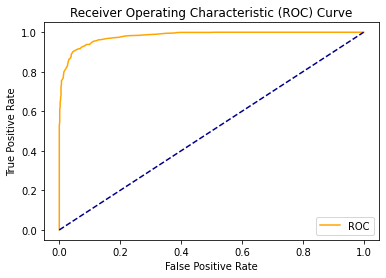

In [80]:
plot_roc_curve(fpr, tpr)

In [81]:
metrics.auc(fpr, tpr)

0.9809662659641287